# Demistifying some ML terms for developers

Machine Learning has a lot of new terminology that might not be used every day by many developers. 
Don't let these intimidate you.  Let's break a few of them down!


# Model

A model is the artifact produced by the machine learning alorithm/process. To put it plainly, a model is a representation of the alorithm with learned variables set to values that produce desired predictions. The model is basically just a function with internal workings that have been tuned by your training experiment rather than a function that has been coded by human hands.

# Vectors & Matrices
- Vector: think of this like a **column** in a spreadsheet - or a series - or a single-dimensional array
    > note: a vector can be horizontal or vertical, but for simplicity, we will use vertical (column) vectors
- Maxtrix: think of this like a **spreadsheet** - or array of arrays - or a collection of vectors (multi-dimensional array).

# Features
- The **variable** name for each data record - the column names of your data. The data itself that the feature represents is composed of a value like a string of characters or number
- Features can be **continuous** (prices, numbers, scales) or **categorical** (labels, class, lists, types, enums)
- Ultimately, we will need all of the values to be numbers so we can do mathematical operations on them

![spreadsheet.png](images/spreadsheet.png)


# Variable Naming Conventions for ML
- **$\mathbf X$** is a matrix of your data set - each row is a record & each column is a feature
- **$\mathbf y$** is a vector of the truth labels or values (eg. actual known sale price of a house, or the correct class label 'Lightning McQueen')
- **$\mathbf{\hat y}$** _(y-hat)_ is a vector of your models predictions (values or labels) -- typically, this is written in code with variable names of either "yhat", "hypothesis", or "predictions"
- **Shape** is the dimensions of your matrix. 
  - If you have a dataframe with 100 items and 3 feature columns, shape would be (100,3)
  
  
# Derivatives
- The gradient or **slope of line** at a given point on the graph

## Visual Example
> don't worry about the code yet--this is just to play around with the idea of a derivative

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot,show
from scipy import interpolate

### --- The Walt Disney Company movies produced each year --- ###

# format:  [Year, Number]
data = np.array([[1937,1],[1938,0],[1939,0],[1940,2],[1941,0],[1942,0],[1943,0],[1944,0],
                 [1945,0],[1946,1],[1947,0],[1948,0],[1949,0],[1950,1],[1951,0],[1952,0],
                 [1953,0],[1954,1],[1955,1],[1956,0],[1957,0],[1958,0],[1959,1],[1960,0],
                 [1961,3],[1962,1],[1963,1],[1964,0],[1965,0],[1966,0],[1967,1],[1968,1],
                 [1969,0],[1970,2],[1971,1],[1972,0],[1973,0],[1974,0],[1975,1],[1976,0],
                 [1977,4],[1978,0],[1979,1],[1980,3],[1981,4],[1982,3],[1983,4],[1984,2],
                 [1985,6],[1986,7],[1987,10],[1988,12],[1989,11],[1990,15],[1991,16],[1992,22],
                 [1993,27],[1994,30],[1995,32],[1996,28],[1997,23],[1998,22],[1999,21],[2000,19],
                 [2001,14],[2002,22],[2003,19],[2004,19],[2005,17],[2006,18],[2007,14],[2008,13],
                 [2009,16],[2010,14],[2011,14],[2012,10],[2013,10],[2014,13],[2015,11],[2016,14],
                 [2017,9],[2018,11]])
# Showing Derivative slope tangent line
# Adapted from post at https://glowingpython.blogspot.com/2013/02/visualizing-tangent.html
def draw_tangent(x,y,a,color):
 # interpolate the data with a spline
 spl = interpolate.splrep(x,y)
 small_t = np.arange(a-5,a+5)
 fa = interpolate.splev(a,spl,der=0)     # f(a)
 fprime = interpolate.splev(a,spl,der=1) # f'(a)
 tan = fa+fprime*(small_t-a) # tangent
 plot(a,fa,'om',small_t,tan,'--'+color)

# use python's slicing to select all rows from column 0 
year = data[:,0]
# use python's slicing to select all rows from column 1
num_movies = data[:,1]

# now let's draw a tangent line
# you can change these year values to see it move on the plot below
draw_tangent(year,num_movies,1951,'k')
draw_tangent(year,num_movies,1998,'r')

plot(year,num_movies,alpha=0.5)
show()

# Now it's your turn to play around. Update the years above and hit ctrl+enter to run)

# Cost and Loss Functions
- A way to calculate **how much error** the current model iteration has
- The **error** of a model is determined by calculating how far off of the truth your prediction was (commonly, this is determined by using the Mean Squared Error function described later)
- A way to graph how well your model fits your data as you adjust your model's variables to various values searching for lowest cost/loss

- Additional visualizations of derivatives, gradient descent, and cost functions:
https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a

# Gradient Descent
- just taking the fastest way down the hill - imagine taking a 360 degree look around & then taking a small step in the steepest direction
- good examples visualizing & animating this at: http://tiao.io/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

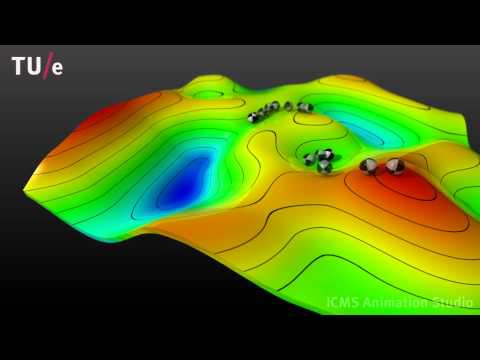

In [1]:
from IPython.lib.display import YouTubeVideo
kwargs = {'modestbranding': 1, 'rel':0, 'end':22}
YouTubeVideo('vWFjqgb-ylQ',start=4, width=500,height=300,**kwargs)

# Regression
- Predicting a continuous output value based on input variables
  -  eg. Predict a Guest's 'spend' at Disney World based on how many 'days' they attend the parks

# Multivariate Linear Regression
Sounds complex but lets break it down :)
- Regression: a continous value output
- Linear: it uses a linear function to plot the line that fits your data
- Multivariate: multiple input variables (not just one)

![image.png](images/regression.png)

# Accuracy
- Accuracy: What percent of all your predictions are correct?
  - **Beware this may not be the best measure for your model**
  
  ###  **Importance of Recall and Precision vs Accuracy**
  - **Accuracy does not work for unbalanced classification data** (where there are more of one class than the other)
    - If you expect to see 1 security anomaly event for every 100,000 normal user events, you can achieve 99.999% _accuracy_ by coding a model that just predicts "NO" all the time.
  - this is a good metric if the truth is a 50/50 ratio (e.g. saying "NO" 100% of the time when asked if a random human is male has an accuracy of ~50%)

# Recall
- Recall: Measures how well we do finding all the possible needles
  - How many needles can we find in the haystack?
  - What percent of the _all the needles_ did we find (classify as a needle)?
  > you can get 100% Recall by always saying "Yes" - but your Precision will be 0

# Precision
- Precision: Measures how well we do when we claim something is a needle
  - How many predicted needles _really are_ needles?
  - What percent of our 'true' needle predictions are really needles?
  > you can get 100% Precision by always saying "No" - but your Recall will be 0
  

![precision_recall.jpg](images/precision_recall.jpg)

# Overfitting and Underfitting 

![Variance vs Bias](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/512px-Kernel_Machine.svg.png)
- Variance vs Bias image by Alisneaky, svg version by User:Zirguezi - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=47868867


## Variance (Overfitting)
- If your prediction algortithm tried too hard to match every positive training example, it can "overfit" the data and ultimately make bad predictions on new data as it can build up affinity for noise.

### You can sometimes fix overfitting by
- Getting more training examples (more data)
- Decreasing the number of features
- increasing λ (lambda) regularization value

## Bias (Underfitting)
- if your predictions make too many assumptions about the data, it can "underfit" the data by missing relavent relations between data points.

### You can sometimes fix underfitting by
- Adding more features
- Adding polynomial features
- Decreasing λ (lambda) regularization value

# Next Up
[Regression or Classification?](03%20-%20Regression%20or%20Classification.ipynb)